# Louisville Police Stops

## The city of Louisville hosts a large amount of data [here](https://data.louisvilleky.gov/) that we can analyze with Python
### Site: https://data.louisvilleky.gov/

Do you know (some) Python, but you've never used Pandas? Here's an [awesome video tutorial](https://www.youtube.com/watch?v=fwWCw_cE5aI&feature=youtu.be) from Yury Kashnitsky, creator of the free and open source [mlcourse.ai](mlcourse.ai)



In [16]:
# standard data science imports with abbreviations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [17]:
# this is a line you should always include in jupyter, it will make
# sure your graphs are properly displayed in the notebook
%matplotlib inline

Set the path to our csv (comma separated values) file. 

In [18]:
# Change the path to the dataset file if needed. 
PATH = '../data/LMPD_STOPS.csv'

Read in the csv file and look at the first 20 entries. NaN means not a number and is the token the city is using to represent missing data. df is short for DataFrame and can be thought of as a table like those you might be familiar with from SQL.

In [19]:
df = pd.read_csv(PATH)
df.head(20)

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH
0,1,NaN,NaN,WARNING,NaN,NaN,NaN,01/24/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2,NaN,NaN,WARNING,NaN,NaN,NaN,01/30/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,3,NaN,NaN,WARNING,NaN,NaN,NaN,09/20/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,4,NaN,NaN,WARNING,F,WHITE,21 - 30,01/22/2016,14:42:00,SHAWNEE PARK,2ND DIVISION,BEAT 1,M,BLACK,31 - 40,3,NO,NaN
4,5,NaN,NaN,WARNING,F,WHITE,21 - 30,09/14/2015,21:10:00,RIVERPARK/34TH,2ND DIVISION,BEAT 1,M,BLACK,20 - 25,0,YES,PROBABLE CAUSE
5,6,NaN,NaN,WARNING,F,WHITE,21 - 30,12/03/2015,13:39:00,32ND/WOODLAND,2ND DIVISION,BEAT 3,F,BLACK,16 - 19,0,NO,NaN
6,7,NaN,NaN,WARNING,F,WHITE,21 - 30,12/04/2015,14:18:00,22ND/DUMESNIL,2ND DIVISION,BEAT 3,M,BLACK,OVER 60,2,NO,NaN
7,8,NaN,NaN,WARNING,F,WHITE,21 - 30,12/10/2015,13:45:00,DIXIE/OAK,2ND DIVISION,BEAT 3,F,BLACK,OVER 60,2,NO,NaN
8,9,NaN,NaN,WARNING,F,WHITE,31 - 40,03/29/2015,20:05:00,3108 LARKWOOD,2ND DIVISION,BEAT 1,F,WHITE,31 - 40,0,NO,NaN
9,10,NaN,NaN,WARNING,F,WHITE,31 - 40,03/29/2015,20:33:00,41 & VERMONT,2ND DIVISION,BEAT 1,M,BLACK,20 - 25,0,NO,NaN


In [20]:
# Show number of rows/columns in our dataframe, note this is an attribute and not a function so you don't need ()
df.shape

(111582, 18)

Let's take a quick look at what columns are available to us since they run off the screen

In [21]:
df.columns

Index(['ID', 'TYPE_OF_STOP', 'CITATION_CONTROL_NUMBER', 'ACTIVITY RESULTS',
       'OFFICER_GENDER', 'OFFICER_RACE', 'OFFICER_AGE_RANGE', 'ACTIVITY_DATE',
       'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 'ACTIVITY_DIVISION',
       'ACTIVITY_BEAT', 'DRIVER_GENDER', 'DRIVER_RACE', 'DRIVER_AGE_RANGE',
       'NUMBER OF PASSENGERS', 'WAS_VEHCILE_SEARCHED', 'REASON_FOR_SEARCH'],
      dtype='object')

In [22]:
# or if you want it to be a little cleaner
for col in sorted(df.columns): print(col)

ACTIVITY RESULTS
ACTIVITY_BEAT
ACTIVITY_DATE
ACTIVITY_DIVISION
ACTIVITY_LOCATION
ACTIVITY_TIME
CITATION_CONTROL_NUMBER
DRIVER_AGE_RANGE
DRIVER_GENDER
DRIVER_RACE
ID
NUMBER OF PASSENGERS
OFFICER_AGE_RANGE
OFFICER_GENDER
OFFICER_RACE
REASON_FOR_SEARCH
TYPE_OF_STOP
WAS_VEHCILE_SEARCHED


If you want to remove some columns that aren't of interest, use `df.drop()` it has an argument `inplace=False` that will not overwrite the current dataframe, but instead returns a new one. If you set `inplace=True` it will remove the column from the dataframe directly. Also if you want to remove a column, you need to specify `axis=1`, because the default `axis=0` is for rows. Let's get rid of `CITATION_CONTROL_NUMBER` 

In [23]:
# Notice we now have 17 columns instead of 18
df.drop('CITATION_CONTROL_NUMBER', axis=1, inplace=True)
df.shape

(111582, 17)

Calling `df.info()` on a pandas dataframe gives you a list of how many entries there are in each column (NaN not included) and is a good first step to take when looking at your data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111582 entries, 0 to 111581
Data columns (total 17 columns):
ID                      111582 non-null int64
TYPE_OF_STOP            111455 non-null object
ACTIVITY RESULTS        111582 non-null object
OFFICER_GENDER          111426 non-null object
OFFICER_RACE            111426 non-null object
OFFICER_AGE_RANGE       109086 non-null object
ACTIVITY_DATE           111582 non-null object
ACTIVITY_TIME           111548 non-null object
ACTIVITY_LOCATION       111443 non-null object
ACTIVITY_DIVISION       111189 non-null object
ACTIVITY_BEAT           111163 non-null object
DRIVER_GENDER           111546 non-null object
DRIVER_RACE             111550 non-null object
DRIVER_AGE_RANGE        111554 non-null object
NUMBER OF PASSENGERS    111582 non-null int64
WAS_VEHCILE_SEARCHED    111579 non-null object
REASON_FOR_SEARCH       6922 non-null object
dtypes: int64(2), object(15)
memory usage: 14.5+ MB


df.describe() is a really useful function if you have numerical data, and automatically gives you basic statistical info like max/min/std/average/quartiles. Here we have (almost) no numerical data, only categorical so it isn't helpful, unless you want to know that the average car that gets pulled over has half a passenger. 

In [25]:
df.describe()

,ID,NUMBER OF PASSENGERS
count,111582.000000,111582.000000
mean,55791.500000,0.501362
std,32211.093206,0.943409
min,1.000000,0.000000
25%,27896.250000,0.000000
50%,55791.500000,0.000000
75%,83686.750000,1.000000
max,111582.000000,50.000000


To see the entries in a column, type df["ColumnName"]. The city has a typo in their column name.

In [9]:
df["WAS_VEHCILE_SEARCHED"].head(5)

0    NaN
1    NaN
2    NaN
3     NO
4    YES
Name: WAS_VEHCILE_SEARCHED, dtype: object

We can get a look at the different values in a column, and how frequently they occur by grabbing a column and calling it's `value_counts()` function. Let's use it to see how many men were pulled over compared to women.

In [10]:
df["DRIVER_GENDER"].value_counts()

M    70825
F    40721
Name: DRIVER_GENDER, dtype: int64

If you put `== [some value]` after a column, youll get back a list of indices and True/False values. True indicates that at that index, that column's value matched the value `[some value]`. This is easier to show with an example. Below we look at the values of the "WAS_VEHCILE_SEARCHED" (sic) and see whether the value is "YES". As expected this gives us back the indices and True/False for whether it was a match. 

In [26]:
(df["WAS_VEHCILE_SEARCHED"] == "YES").head(10)

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: WAS_VEHCILE_SEARCHED, dtype: bool

Having those True/False values isn't actually all that useful on it's own. What we want to use it for is to then pull the rows out of the dataframe where that condition was true. Pandas is built on NumPy, an efficient numerical computing library in Python, and both Pandas and Numpy offer really advanced indexing that can't be done with normal Python lists. If this makes no sense, don't worry about it, all you need to know is that if we can put the above statement inside the brackets of `df[]` and it will pull out all the rows where that condition is true.

In [12]:
df[df["WAS_VEHCILE_SEARCHED"] == "YES"].head(10)

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH
4,5,NaN,NaN,WARNING,F,WHITE,21 - 30,09/14/2015,21:10:00,RIVERPARK/34TH,2ND DIVISION,BEAT 1,M,BLACK,20 - 25,0,YES,PROBABLE CAUSE
13,14,NaN,NaN,WARNING,F,WHITE,31 - 40,05/03/2015,16:30:00,34 & JEFFERSON,2ND DIVISION,BEAT 1,M,BLACK,20 - 25,0,YES,CONSENT
37,38,NaN,NaN,WARNING,M,WHITE,31 - 40,03/23/2015,14:05:00,BLOSSOM LN/GOOSE CREEK RD,8TH DIVISION,BEAT 2,M,WHITE,31 - 40,1,YES,CONSENT
43,44,NaN,NaN,WARNING,M,WHITE,31 - 40,10/05/2015,21:30:00,3000 FORDHAVEN,3RD DIVISION,BEAT 2,F,WHITE,20 - 25,1,YES,CONSENT
46,47,NaN,NaN,WARNING,M,WHITE,31 - 40,11/29/2015,04:00:00,CARROLL AVE //DURRETT LN,6TH DIVISION,BEAT 2,F,WHITE,31 - 40,0,YES,CONSENT
48,49,NaN,NaN,WARNING,M,WHITE,40 - 50,03/23/2015,12:10:00,I65SB@124MM,NaN,NaN,F,HISPANIC,20 - 25,0,YES,CONSENT
52,53,NaN,NaN,WARNING,M,WHITE,50 - 60,02/14/2016,13:25:00,I264 E @ 6 MILE MARKER,2ND DIVISION,BEAT 6,M,WHITE,31 - 40,0,YES,TERRY STOP / PAT DOW
56,57,NaN,CD46651,CITATION ISSUED,M,WHITE,31 - 40,03/09/2016,21:44:00,I64W/HURSTBOURNE,8TH DIVISION,BEAT 5,M,WHITE,20 - 25,1,YES,PROBABLE CAUSE
58,59,NaN,H674371,CITATION ISSUED,F,WHITE,31 - 40,06/20/2015,13:15:00,1800 BLK BERRY BLVD,4TH DIVISION,BEAT 1,M,WHITE,31 - 40,2,YES,CONSENT
59,60,NaN,L584397,CITATION ISSUED,F,WHITE,31 - 40,05/28/2015,19:30:00,26TH @ VIRGINIA,1ST DIVISION,BEAT 1,M,BLACK,31 - 40,4,YES,PROBABLE CAUSE


Since this subset is itself a Pandas dataframe, we can do operations on it just like we did above. We can store it in a new df, let's call it df_searched, and that way the future lookups we do won't get really long and complex. After that let's look at the reasons people were searched. Note we couldnt do this before narrowing to the people who actually were searched because most of the values would be missing as the search reason is NaN for someone who wasn't searched. 

Also instead of calling `.head(10)` to show the first entries, we can just index in in normal Python style. This is more flexible in cases where you need to look at entries 50-100 or something like that

In [17]:
df_searched = df[df["WAS_VEHCILE_SEARCHED"] == "YES"]
df_searched["REASON_FOR_SEARCH"][:10]

4           PROBABLE CAUSE
13                 CONSENT
37                 CONSENT
43                 CONSENT
46                 CONSENT
48                 CONSENT
52    TERRY STOP / PAT DOW
56          PROBABLE CAUSE
58                 CONSENT
59          PROBABLE CAUSE
Name: REASON_FOR_SEARCH, dtype: object

Remember to call `.value_counts` to grab every unique value in the column, and how many times it occurred (similar functionality to a Python 'Counter' object). On this one we don't call `.head()` because it's interesting to see all of the random reasons people got searched. It also gives us insight into how clean our dataset is. In this case, not very clean, because many of the labels are meant to be the same, but aren't equal. For instance "PROBABLE CAUSE", "PC", "P.C."...etc, more on that later

In [22]:
df_searched["REASON_FOR_SEARCH"].value_counts()

CONSENT                 3773
PROBABLE CAUSE          2119
INCIDENT TO ARREST       193
PC                       191
ARREST                    90
OTHER                     28
PERMISSIVE                22
PC AND CONSENT            21
SIA                       20
TERRY STOP / PAT DOW      14
PC, CONSENT               11
PC ODOR                   10
PC AND SIA                10
CONSENT AND PC             9
PLAIN VIEW                 8
SEARCH INCIDENT TO A       7
STRONG ODOR OF MARIJ       6
INCIDENT TO ARREST.        6
ODOR                       6
PERMISSIVE.                6
P.C.                       6
STRONG SMELL OF MARI       5
PC/CONSENT                 5
STOLEN VEHICLE             5
ACCIDENT INVESTIGATI       5
PROBABLE CAUSE TO SU       4
ODOR OF MARIJUANA          4
PC/PLAIN VIEW              4
PC ODOR OF MARIJUANA       3
CONSENT SEARCH             3
                        ... 
ODOR,CONSENT               1
PROBABLE CAUSE: ODOR       1
PC PILLS & MAR             1
ODOR OF DRUGS 

If you pass `normalize=True` to value_counts, it will give you back the percent of each value instead of the absolute number of instances

In [23]:
df_searched["REASON_FOR_SEARCH"].value_counts(normalize=True).head(10)

CONSENT                 0.547685
PROBABLE CAUSE          0.307592
INCIDENT TO ARREST      0.028016
PC                      0.027725
ARREST                  0.013064
OTHER                   0.004064
PERMISSIVE              0.003193
PC AND CONSENT          0.003048
SIA                     0.002903
TERRY STOP / PAT DOW    0.002032
Name: REASON_FOR_SEARCH, dtype: float64

## Cleaning the data so that we can do visualization and correlation
It is clear that the table below is pretty useless, we need to clean the data a bit to be able to do more powerful analysis.

In [27]:
df.corr()

,ID,NUMBER OF PASSENGERS
ID,1.00000,-0.07817
NUMBER OF PASSENGERS,-0.07817,1.00000


dtype is short for "data type" and tells us how the data is being stored in pandas/python. We can look at the dtype of a given column, for officer race, it is being stored as an object, which is pandas version of String. Here is a helpful chart of python/pandas dtypes, taken from [this pbpython.com article on dtypes](https://pbpython.com/pandas_dtypes.html)

![Pandas dtypes](../data/pandas_dtype.png)

In [31]:
df["OFFICER_RACE"].dtype

dtype('O')

`.astype()` will let us convert strings to categories and make them easier to deal with

In [33]:
df["OFFICER_RACE"] = df["OFFICER_RACE"].astype('category')
df["OFFICER_RACE"].dtype

CategoricalDtype(categories=['ASIAN', 'BLACK', 'HISPANIC', 'OTHER', 'WHITE'], ordered=False)

In [35]:
# remember, we can also see all types by calling df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111582 entries, 0 to 111581
Data columns (total 17 columns):
ID                      111582 non-null int64
TYPE_OF_STOP            111455 non-null object
ACTIVITY RESULTS        111582 non-null object
OFFICER_GENDER          111426 non-null object
OFFICER_RACE            111426 non-null category
OFFICER_AGE_RANGE       109086 non-null object
ACTIVITY_DATE           111582 non-null object
ACTIVITY_TIME           111548 non-null object
ACTIVITY_LOCATION       111443 non-null object
ACTIVITY_DIVISION       111189 non-null object
ACTIVITY_BEAT           111163 non-null object
DRIVER_GENDER           111546 non-null object
DRIVER_RACE             111550 non-null object
DRIVER_AGE_RANGE        111554 non-null object
NUMBER OF PASSENGERS    111582 non-null int64
WAS_VEHCILE_SEARCHED    111579 non-null object
REASON_FOR_SEARCH       6922 non-null object
dtypes: category(1), int64(2), object(14)
memory usage: 13.7+ MB


There is a bit of a logic as to what every column should be. If it is an object, but there is a limited number of options, we probably want category (gender, race, age_range) fall into this category. To see how many options there are for a column, use `df["colname"].nuniques()`. Reason for search should likely be categorical, but because the data is messy and the officers wrote different descriptions for the same reason (e.g. probable cause, pc, p.c., p.c ...etc), we can't make it categorical just yet 

In [43]:
print("# of age ranges:", df["DRIVER_AGE_RANGE"].nunique())
print("# of reasons:", df["REASON_FOR_SEARCH"].nunique())

# of age ranges: 8
# of reasons: 296


In [40]:
# the following should be categories 
cat_list = []

In [31]:
terms = set()
for k,v in dict(df_searched["REASON_FOR_SEARCH"]).items():
    if "PC" in v[1] or "P.C" in v: terms.add(v)

P
C
C
C
C
C
T
P
C
P
P
C
P
P
C
C
P
P
P
P
C
P
P
I
P
P
C
C
P
C
P
P
P
P
C
P
P
C
C
C
P
P
P
O
C
C
C
C
C
C
P
P
C
C
C
C
C
C
C
C
P
C
C
C
C
C
C
C
C
C
P
C
C
C
C
C
C
C
C
C
C
C
P
C
C
C
C
C
P
C
P
C
P
C
P
T
C
C
C
C
C
C
C
C
C
P
P
C
C
C
C
C
P
C
C
C
P
P
C
C
C
C
C
C
C
C
C
C
P
C
C
C
C
C
C
I
I
P
P
C
P
P
C
C
C
C
P
C
C
C
P
P
C
P
C
C
C
C
P
C
C
C
C
C
P
C
T
C
C
C
C
P
P
P
C
P
C
P
C
C
C
P
C
P
C
C
C
C
C
I
C
P
P
C
C
C
C
C
C
P
I
P
P
C
C
C
P
P
P
P
C
P
C
P
P
P
P
I
C
P
P
P
O
P
P
C
P
P
C
P
P
C
P
P
P
P
P
P
P
P
P
P
P
P
C
C
P
P
P
P
P
C
P
C
P
P
P
P
C
P
C
P
P
C
P
C
P
P
P
P
P
C
C
C
C
C
P
C
P
C
C
P
P
C
P
P
C
P
C
P
P
C
C
P
C
C
P
C
P
P
C
P
O
P
C
C
P
C
C
P
P
P
C
P
P
P
P
P
P
P
P
P
P
P
P
P
C
P
P
C
P
C
C
P
P
C
C
P
P
C
C
O
P
P
O
P
P
P
P
P
P
P
C
C
P
P
P
C
C
C
C
P
P


TypeError: 'float' object is not subscriptable

In [49]:
pc_names = ["P.C.", "PC ODOR", "CONSENT AND PC", "PC, CONSENT", "PC AND SIA"]

In [50]:
for pc_name in pc_names:
    df.loc[df["REASON_FOR_SEARCH"] == pc_name] = "PROBABLE CAUSE" 

In [54]:
import json

In [55]:
x = '''{"help":"Return the metadata of a dataset (package) and its resources. :param id: the id or name of the dataset :type id: string","success":true,"result":[{"id":"6bfb1bc4-0e79-4995-b6d1-0c36aaa30b33","name":"lmpd-stops-data","title":"LMPD Stops Data","maintainer":"Louisville Metro Open Data","maintainer_email":"opendata@louisvilleky.gov","notes":"\u003Cp\u003EThe data for Vehicle Stops begins January 1st, 2015. The data includes vehicle stops. Not included in the data are vehicle collisions, stranded motorists or non-moving vehicles. The Louisville Metro Police Department previously engaged the University of Louisville to conduct an analysis of LMPD\u2019s vehicle stops. This study can be located at:\u003Cbr \/\u003E\n\u003Ca href=\u0022http:\/\/goo.gl\/cR9O4a\u0022\u003Ehttp:\/\/goo.gl\/cR9O4a\u003C\/a\u003E\u003C\/p\u003E\n\u003Cp\u003EINCIDENT_NUMBER links these data sets together:\u003C\/p\u003E\n\u003Col\u003E\n\u003Cli\u003E\u003Ca href=\u0022https:\/\/data.louisvilleky.gov\/dataset\/crime-data\u0022\u003Ehttps:\/\/data.louisvilleky.gov\/dataset\/crime-data\u003C\/a\u003E\u003C\/li\u003E\n\u003Cli\u003E\u003Ca href=\u0022https:\/\/data.louisvilleky.gov\/dataset\/uniform-citation-data\u0022\u003Ehttps:\/\/data.louisvilleky.gov\/dataset\/uniform-citation-data\u003C\/a\u003E\u003C\/li\u003E\n\u003Cli\u003E\u003Ca href=\u0022https:\/\/data.louisvilleky.gov\/dataset\/firearms-intake\u0022\u003Ehttps:\/\/data.louisvilleky.gov\/dataset\/firearms-intake\u003C\/a\u003E\u003C\/li\u003E\n\u003Cli\u003E\u003Ca href=\u0022https:\/\/data.louisvilleky.gov\/dataset\/lmpd-hate-crimes\u0022\u003Ehttps:\/\/data.louisvilleky.gov\/dataset\/lmpd-hate-crimes\u003C\/a\u003E\u003C\/li\u003E\n\u003Cli\u003E\u003Ca href=\u0022https:\/\/data.louisvilleky.gov\/dataset\/assaulted-officers\u0022\u003Ehttps:\/\/data.louisvilleky.gov\/dataset\/assaulted-officers\u003C\/a\u003E\u003C\/li\u003E\n\u003C\/ol\u003E\n\u003Cp\u003ECITATION_CONTROL_NUMBER links these data sets together:\u003C\/p\u003E\n\u003Col\u003E\n\u003Cli\u003E\u003Ca href=\u0022https:\/\/data.louisvilleky.gov\/dataset\/uniform-citation-data\u0022\u003Ehttps:\/\/data.louisvilleky.gov\/dataset\/uniform-citation-data\u003C\/a\u003E\u003C\/li\u003E\n\u003Cli\u003E\u003Ca href=\u0022https:\/\/data.louisvilleky.gov\/dataset\/lmpd-stops-data\u0022\u003Ehttps:\/\/data.louisvilleky.gov\/dataset\/lmpd-stops-data\u003C\/a\u003E\u003C\/li\u003E\n\u003C\/ol\u003E\n\u003Cp\u003E\u003Cem\u003ENote:\u003C\/em\u003E When examining this data, make sure to read the \u003Ca href=\u0022https:\/\/data.louisvilleky.gov\/louisville-metro-government-open-data-platform-terms-use\u0022\u003ELMPD Crime Data section in our Terms of Use\u003C\/a\u003E.\u003C\/p\u003E\n","url":"https:\/\/data.louisvilleky.gov\/dataset\/lmpd-stops-data","state":"Active","log_message":"Update to resource \u0027Property title\u0027","private":true,"revision_timestamp":"Fri, 09\/06\/2019 - 15:21","metadata_created":"Tue, 06\/21\/2016 - 19:26","metadata_modified":"Fri, 09\/06\/2019 - 15:21","creator_user_id":"83bc8340-c8c0-4307-b0cf-7c658a0e6dd5","type":"Dataset","resources":[{"id":"b0d85ccf-680b-4faa-8eb5-e6f7a5fd28b4","revision_id":"","url":"https:\/\/data.louisvilleky.gov\/sites\/default\/files\/LMPD_STOPS_DATA_12.csv","description":"\u003Cp\u003ESubset of the full stops data for 3 years only.\u003C\/p\u003E\n","format":"csv","state":"Active","revision_timestamp":"Fri, 09\/06\/2019 - 15:01","name":"LMPD Stops Data (2015-17)","mimetype":"text\/csv","size":"22.15 MB","created":"Tue, 06\/28\/2016 - 08:43","resource_group_id":"9abda428-17ae-4046-9645-244ae0e56e27","last_modified":"Date changed  Fri, 09\/06\/2019 - 15:01"},{"id":"17fb636d-c060-4f3b-92cd-d3262d2167c0","revision_id":"","url":"\u003Cdiv class=\u0022field field-name-field-link-remote-file field-type-file field-label-hidden\u0022\u003E\u003Cdiv class=\u0022field-items\u0022\u003E\u003Cdiv class=\u0022field-item even\u0022\u003Ehttps:\/\/lky-open-data.s3.amazonaws.com\/LMPD\/LMPD_STOPS_DATA.CSV\u003C\/div\u003E\u003C\/div\u003E\u003C\/div\u003E","description":"\u003Cp\u003E2009 until now.\u003C\/p\u003E\n","format":"csv","state":"Active","revision_timestamp":"Fri, 09\/06\/2019 - 15:00","name":"LMPD Stops Data","mimetype":"csv","size":"","created":"Fri, 09\/06\/2019 - 15:00","resource_group_id":"9abda428-17ae-4046-9645-244ae0e56e27","last_modified":"Date changed  Fri, 09\/06\/2019 - 15:00"}],"groups":[{"description":"\u003Cp\u003EThe Louisville Metro Police Department (LMPD) began operations on January 6, 2003, as part of the creation of the consolidated city-county government in Louisville, Kentucky. It was formed by the merger of the Jefferson County Police Department and the Louisville Division of Police. The Louisville Metro Police Department is headed by Chief Steve Conrad. LMPD divides Jefferson County into eight patrol divisions and operates a number of special investigative and support units.\u003C\/p\u003E\n","id":"9abda428-17ae-4046-9645-244ae0e56e27","image_display_url":"https:\/\/data.louisvilleky.gov\/sites\/default\/files\/metropolice.png","title":"Metro Police","name":"group\/metro-police-0"}]}]}'''

In [56]:
json.dumps(x)

'"{\\"help\\":\\"Return the metadata of a dataset (package) and its resources. :param id: the id or name of the dataset :type id: string\\",\\"success\\":true,\\"result\\":[{\\"id\\":\\"6bfb1bc4-0e79-4995-b6d1-0c36aaa30b33\\",\\"name\\":\\"lmpd-stops-data\\",\\"title\\":\\"LMPD Stops Data\\",\\"maintainer\\":\\"Louisville Metro Open Data\\",\\"maintainer_email\\":\\"opendata@louisvilleky.gov\\",\\"notes\\":\\"<p>The data for Vehicle Stops begins January 1st, 2015. The data includes vehicle stops. Not included in the data are vehicle collisions, stranded motorists or non-moving vehicles. The Louisville Metro Police Department previously engaged the University of Louisville to conduct an analysis of LMPD\\u2019s vehicle stops. This study can be located at:<br \\\\/>\\n<a href=\\"http:\\\\/\\\\/goo.gl\\\\/cR9O4a\\">http:\\\\/\\\\/goo.gl\\\\/cR9O4a<\\\\/a><\\\\/p>\\n<p>INCIDENT_NUMBER links these data sets together:<\\\\/p>\\n<ol>\\n<li><a href=\\"https:\\\\/\\\\/data.louisvilleky.gov\\\\/

In [60]:
import urllib

In [63]:
response = urllib.request.urlopen('https://data.louisvilleky.gov/api/3/action/package_show?id=6bfb1bc4-0e79-4995-b6d1-0c36aaa30b33')

In [64]:
data = json.loads(response.read())

In [65]:
print(data)

{'help': 'Return the metadata of a dataset (package) and its resources. :param id: the id or name of the dataset :type id: string', 'success': True, 'result': [{'id': '6bfb1bc4-0e79-4995-b6d1-0c36aaa30b33', 'name': 'lmpd-stops-data', 'title': 'LMPD Stops Data', 'maintainer': 'Louisville Metro Open Data', 'maintainer_email': 'opendata@louisvilleky.gov', 'notes': '<p>The data for Vehicle Stops begins January 1st, 2015. The data includes vehicle stops. Not included in the data are vehicle collisions, stranded motorists or non-moving vehicles. The Louisville Metro Police Department previously engaged the University of Louisville to conduct an analysis of LMPD’s vehicle stops. This study can be located at:<br />\n<a href="http://goo.gl/cR9O4a">http://goo.gl/cR9O4a</a></p>\n<p>INCIDENT_NUMBER links these data sets together:</p>\n<ol>\n<li><a href="https://data.louisvilleky.gov/dataset/crime-data">https://data.louisvilleky.gov/dataset/crime-data</a></li>\n<li><a href="https://data.louisvillek

In [66]:
import pprint

In [67]:
pprint.pprint(data)

{'help': 'Return the metadata of a dataset (package) and its resources. :param '
         'id: the id or name of the dataset :type id: string',
 'result': [{'creator_user_id': '83bc8340-c8c0-4307-b0cf-7c658a0e6dd5',
             'groups': [{'description': '<p>The Louisville Metro Police '
                                        'Department (LMPD) began operations on '
                                        'January 6, 2003, as part of the '
                                        'creation of the consolidated '
                                        'city-county government in Louisville, '
                                        'Kentucky. It was formed by the merger '
                                        'of the Jefferson County Police '
                                        'Department and the Louisville '
                                        'Division of Police. The Louisville '
                                        'Metro Police Department is headed by '
               

In [70]:
import seaborn
%matplotlib inline

In [76]:
import pandas as pd

In [77]:
PATH = 'LMPD_STOPS.csv'
df = pd.read_csv(PATH)

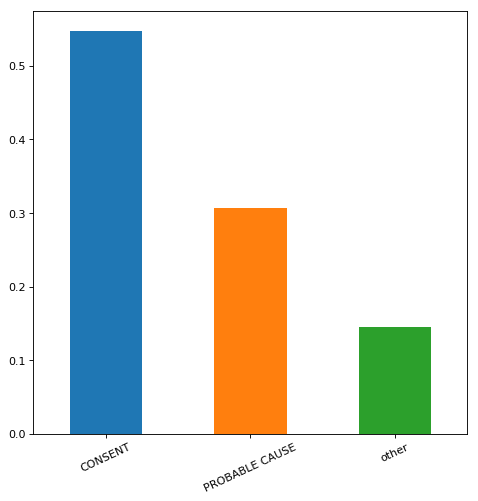

In [80]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
figure(num=None, figsize=(7,7), dpi=80, facecolor='w', edgecolor='k')
s2 = df["REASON_FOR_SEARCH"]
prob = s2.value_counts(normalize=True)
threshold = 0.1
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

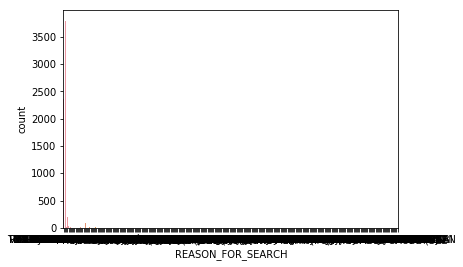

In [71]:
seaborn.countplot(x="REASON_FOR_SEARCH", data=df)

In [81]:
df = pd.read_csv(PATH)
df

,ID,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH
0,1,NaN,NaN,WARNING,NaN,NaN,NaN,01/24/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2,NaN,NaN,WARNING,NaN,NaN,NaN,01/30/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,3,NaN,NaN,WARNING,NaN,NaN,NaN,09/20/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,4,NaN,NaN,WARNING,F,WHITE,21 - 30,01/22/2016,14:42:00,SHAWNEE PARK,2ND DIVISION,BEAT 1,M,BLACK,31 - 40,3,NO,NaN
4,5,NaN,NaN,WARNING,F,WHITE,21 - 30,09/14/2015,21:10:00,RIVERPARK/34TH,2ND DIVISION,BEAT 1,M,BLACK,20 - 25,0,YES,PROBABLE CAUSE
5,6,NaN,NaN,WARNING,F,WHITE,21 - 30,12/03/2015,13:39:00,32ND/WOODLAND,2ND DIVISION,BEAT 3,F,BLACK,16 - 19,0,NO,NaN
6,7,NaN,NaN,WARNING,F,WHITE,21 - 30,12/04/2015,14:18:00,22ND/DUMESNIL,2ND DIVISION,BEAT 3,M,BLACK,OVER 60,2,NO,NaN
7,8,NaN,NaN,WARNING,F,WHITE,21 - 30,12/10/2015,13:45:00,DIXIE/OAK,2ND DIVISION,BEAT 3,F,BLACK,OVER 60,2,NO,NaN
8,9,NaN,NaN,WARNING,F,WHITE,31 - 40,03/29/2015,20:05:00,3108 LARKWOOD,2ND DIVISION,BEAT 1,F,WHITE,31 - 40,0,NO,NaN
9,10,NaN,NaN,WARNING,F,WHITE,31 - 40,03/29/2015,20:33:00,41 & VERMONT,2ND DIVISION,BEAT 1,M,BLACK,20 - 25,0,NO,NaN


In [92]:
df[df["ACTIVITY_DATE"] > "01/01/2018"]["DRIVER_RACE"].value_counts(normalize=True)

WHITE                     0.599784
BLACK                     0.339102
HISPANIC                  0.042726
ASIAN                     0.007572
MIDDLE EASTERN DESCENT    0.006490
ASIAN/PACIFIC ISLANDER    0.002163
INDIAN/INDIA/BURMESE      0.001622
AMERICAN INDIAN           0.000541
Name: DRIVER_RACE, dtype: float64

In [86]:
df["ACTIVITY_DATE"] = pd.to_datetime(df['ACTIVITY_DATE'])

In [103]:
df[(df["ACTIVITY_DATE"] > "01/01/2016") & (df["ACTIVITY_DATE"] < "01/01/2017") ]["DRIVER_AGE_RANGE"].value_counts().sort_index()

16 - 19     2108
20 - 25     6677
26 - 30     5577
31 - 40     8115
41 - 50     5593
51 - 60     3843
OVER 60     1905
UNDER 16      10
Name: DRIVER_AGE_RANGE, dtype: int64

In [105]:
df[(df["ACTIVITY_DATE"] > "01/01/2017") & (df["ACTIVITY_DATE"] < "01/01/2018") ]["DRIVER_AGE_RANGE"].value_counts().sort_index()

16 - 19     1924
20 - 25     5978
26 - 30     4820
31 - 40     7023
41 - 50     4562
51 - 60     3351
OVER 60     1739
UNDER 16      14
Name: DRIVER_AGE_RANGE, dtype: int64